### Strange behaviour: missing river network cells when fetching DHPS from GeoMet WCS

In [187]:
import xarray as xr
import matplotlib.pyplot as plt

from owslib.wcs import WebCoverageService
from owslib.wcs import Authentication

In [211]:
def wcs_layer(
        username: str,
        password: str,
        layer_name: str, 
        coords: tuple, # lat_min, lat_max, lon_min, lon_max 
        interp: str
    ) -> xr.DataArray:
    """ 
    Extracts single layer from WCS and returns data in an xarray DataArray. 
    Default time and dim_reference_time are used.
    """
    
    subsets = [('lat', coords[0], coords[1]), ('lon', coords[2], coords[3])]

    wcs = WebCoverageService(
        f'https://geo.weather.gc.ca/geomet?&SERVICE=WCS&COVERAGEID={layer_name}', 
        auth=Authentication(username=username, password=password),
        version='2.0.1',
        timeout=300
    )

    response = wcs.getCoverage(
        identifier=[layer_name], 
        format='image/netcdf', 
        outputcrs='EPSG:4326',
        subsettingcrs='EPSG:4326', 
        subsets=subsets,
        interpolation=interp
    )
        
    # read into an xarray
    ds = xr.open_dataset(response.read()).load()

    # select data layer for plotting later
    da = ds['Band1']
    
    return da

In [242]:
def wcs_facet(username: str, password: str, layer_name: str, bbox: tuple):
    """ 
    Creates 3 subplots to view WCS layer data with each interpolation option:
    - NEAREST (default)
    - AVERAGE
    - BILINEAR
    """

    # plot settings
    cmap = 'turbo'

    levels = [0, 0.01, 0.1, 1, 10, 100, 1000, 10000] # same levels as default styling of layer on GeoMet

    # figure
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4), sharey=True)

    interp_opts = ['NEAREST', 'AVERAGE', 'BILINEAR']

    for i, opt in enumerate(interp_opts):
        wcs_layer(username, password, layer_name, bbox, opt).plot(levels=levels, cmap=cmap, ax=axs[i])
        axs[i].set_title(opt)

    fig.suptitle(layer_name)

In [238]:
username = 'USERNAME'
password = 'PASSWORD'

In [286]:
# bounding boxes
chaudiere = (45.8, 47, -71.8, -70)
chaudiere_small = (46.6, 46.8, -71.4, -71.1)
chaudiere_med = (46.0, 47.0, -71.6, -70.6)

In [287]:
layer_name = 'DHPS_1km_RiverDischarge'

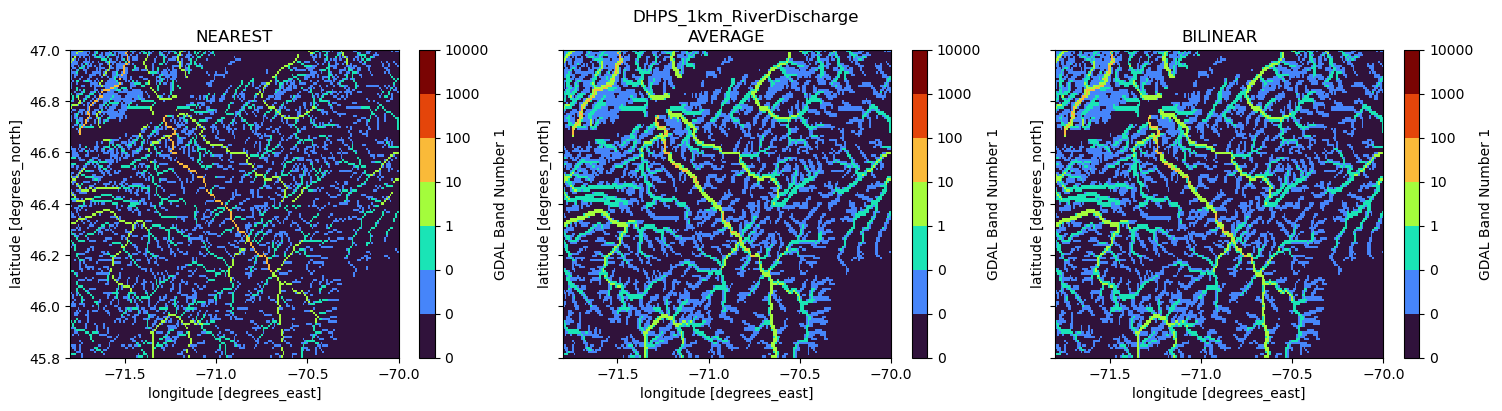

In [288]:
wcs_facet(username, password, layer_name, chaudiere)

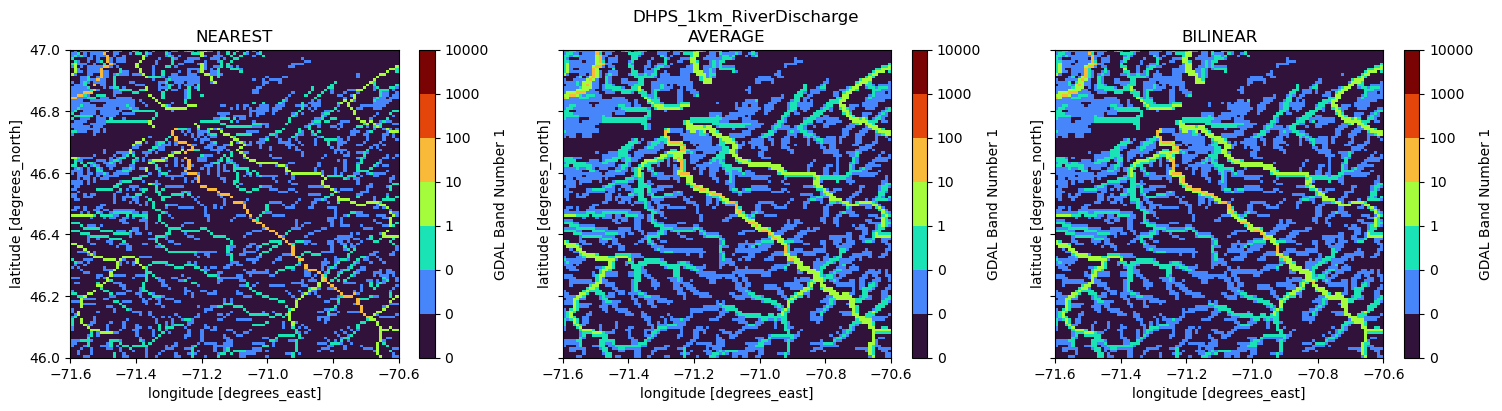

In [289]:
wcs_facet(username, password, layer_name, chaudiere_med)

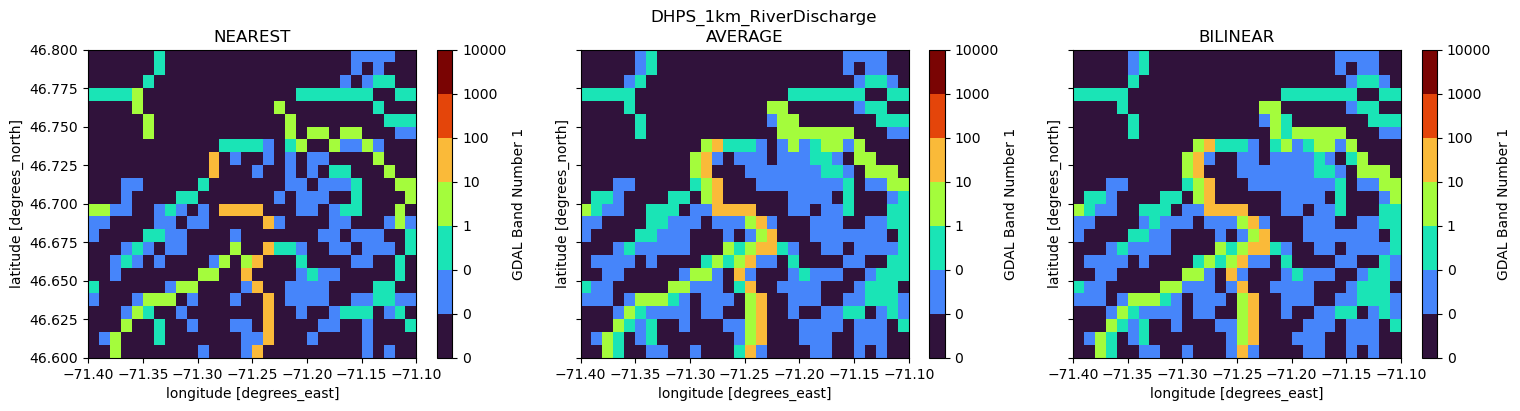

In [290]:
wcs_facet(username, password, layer_name, chaudiere_small)

In [283]:
layer_name = 'DHPS_1km_DrainageArea'

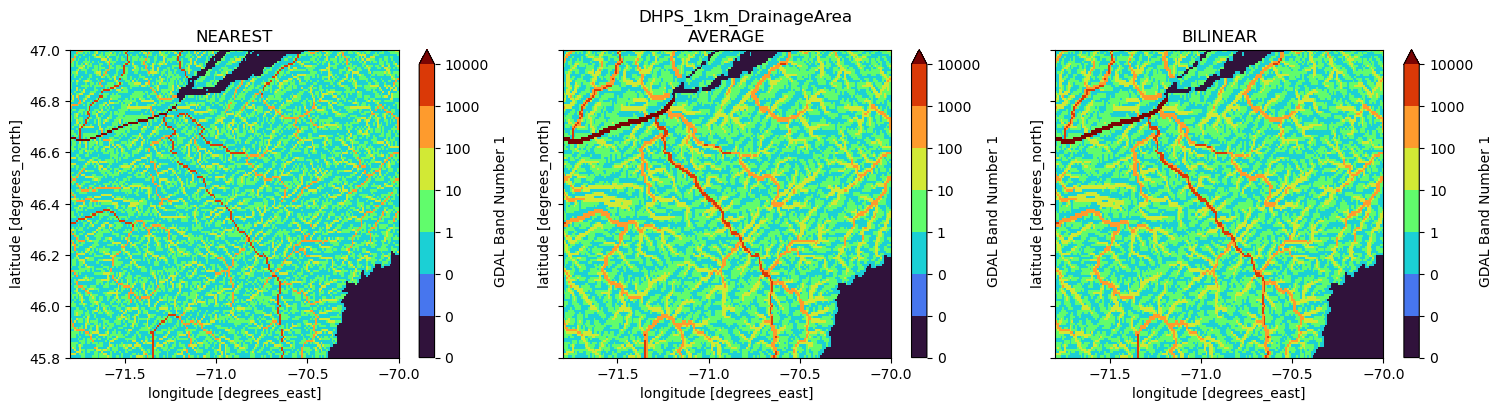

In [284]:
wcs_facet(username, password, layer_name, chaudiere)

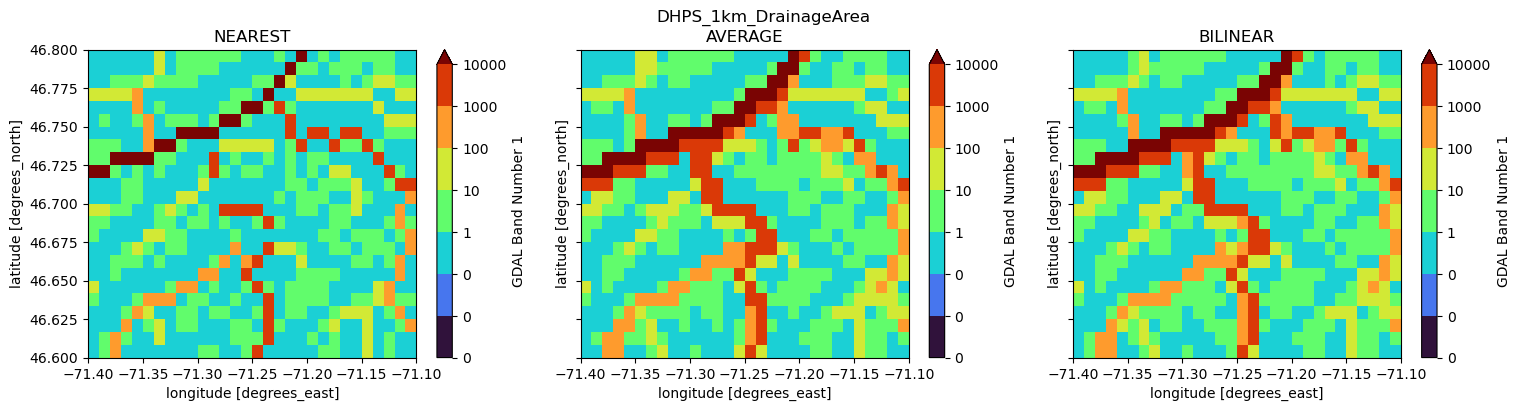

In [285]:
wcs_facet(username, password, layer_name, chaudiere_small)